In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('spam.csv', encoding='latin-1')


In [67]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [68]:
df=df.rename(columns={'v1':'format','v2':'text'})

In [69]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [70]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['format']= label_encoder.fit_transform(df['format'])

In [71]:
df.head()


,format,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


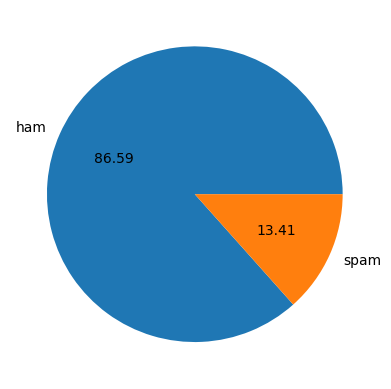

In [72]:
plt.pie(df['format'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [73]:
df['num_charcters']=df['text'].apply(len)

In [74]:
!pip install nltk

In [75]:
import nltk
nltk.download('punkt')
df['text'].apply(lambda x:nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5572, dtype: object

In [76]:
df['Num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [77]:
df['num_sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [78]:
df[['num_charcters','Num_words','num_sen']].describe()

,num_charcters,Num_words,num_sen
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [79]:
df[df['format']==0][['num_charcters','Num_words','num_sen']].describe()


,num_charcters,Num_words,num_sen
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


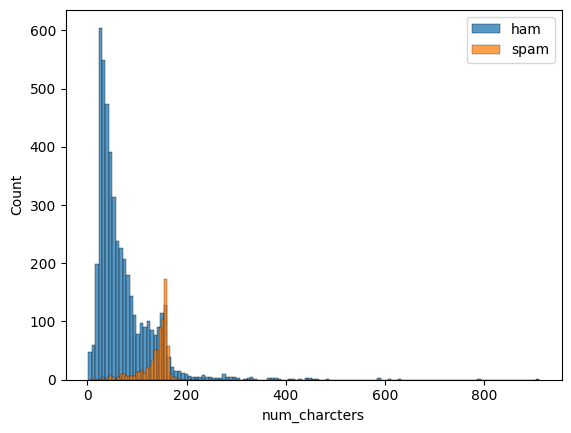

In [80]:
sns.histplot(df[df['format']==0]['num_charcters'],label='ham')
sns.histplot(df[df['format']==1]['num_charcters'],label='spam')
plt.legend()
plt.show()


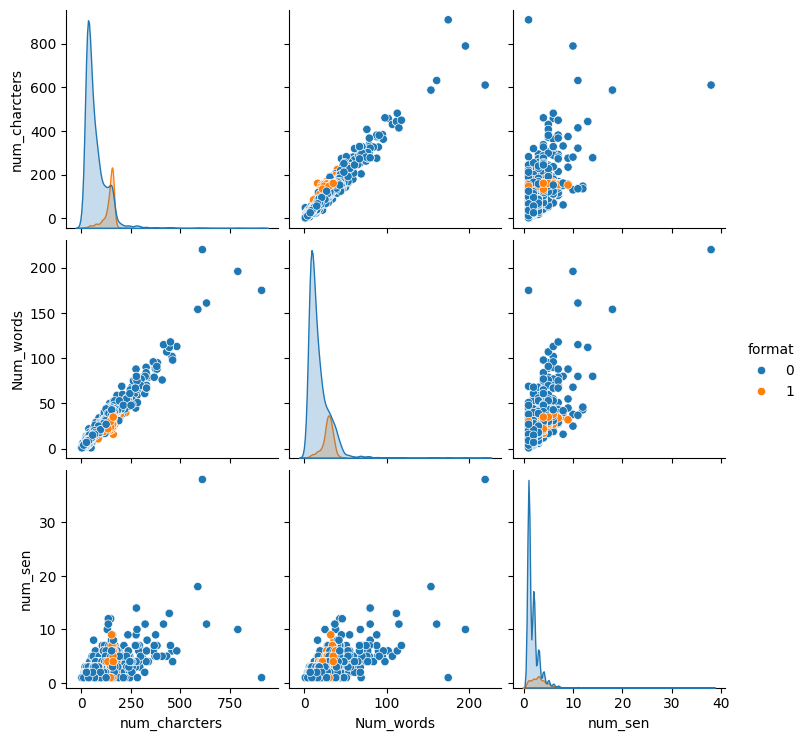

In [81]:
sns.pairplot(df,hue='format')

In [82]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]
    return " ".join(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()




In [84]:
df['transformed_text']=df['text'].apply(transform_text)

In [85]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()


In [86]:
 X=tfidf.fit_transform(df['transformed_text']).toarray()


In [87]:
y=df['format'].values

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [89]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [90]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8600896860986547
[[826 139]
 [ 17 133]]
0.4889705882352941


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='11')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc =BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [92]:
!pip install xgboost


In [93]:
clf = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb

}


In [94]:
def train_classifier(clf,x_train,y_train_,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [95]:
train_classifier(svc, X_train,y_train,X_test,y_test)

(0.9748878923766816, np.float64(0.9621212121212122))

In [96]:
train_classifier(xgb, X_train,y_train,X_test,y_test)

(0.9668161434977578, np.float64(0.952))

In [97]:
train_classifier(knc, X_train,y_train,X_test,y_test)

(0.9121076233183857, np.float64(1.0))

In [98]:
train_classifier(gbdt, X_train,y_train,X_test,y_test)

(0.957847533632287, np.float64(0.9904761904761905))

In [99]:
train_classifier(mnb, X_train,y_train,X_test,y_test)

(0.9632286995515695, np.float64(1.0))

In [43]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(X)


[0 0 0 ... 0 0 0]


In [47]:
from sklearn.ensemble import RandomForestClassifier
rr=RandomForestClassifier()
rr.fit(x_train, y_train)
RandomForestClassifier()
y_pred_rr=rr.predict(x_test)

In [48]:
accuracy_score(y_test, y_pred_rr)

0.9748803827751196

In [101]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [53]:
x_train.shape


(3900, 6708)

In [55]:
X_train.shape

(4457, 6708)

In [57]:
y_test


array([0, 0, 0, ..., 0, 0, 0])

In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(4457, 6708)
(3900,)
(1115, 6708)
(1672,)
